In [1]:
import numpy as np

In [2]:
import pandas as pd

In [55]:
import matplotlib.pyplot as plt

In [54]:
from statsmodels.tsa.stattools import adfuller

In [61]:
import statsmodels.api as sm

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [5]:
mdata= pd.read_csv("temperature_data.csv")

In [52]:
mdata.head(5)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [62]:
mdata.dtypes

Vancouver            float64
Portland             float64
San Francisco        float64
Seattle              float64
Los Angeles          float64
San Diego            float64
Las Vegas            float64
Phoenix              float64
Albuquerque          float64
Denver               float64
San Antonio          float64
Dallas               float64
Houston              float64
Kansas City          float64
Minneapolis          float64
Saint Louis          float64
Chicago              float64
Nashville            float64
Indianapolis         float64
Atlanta              float64
Detroit              float64
Jacksonville         float64
Charlotte            float64
Miami                float64
Pittsburgh           float64
Toronto              float64
Philadelphia         float64
New York             float64
Montreal             float64
Boston               float64
Beersheba            float64
Tel Aviv District    float64
Eilat                float64
Haifa                float64
Nahariyya     

In [8]:
mdata = mdata.set_index('datetime')

In [12]:
print(mdata.shape)

(45253, 36)


In [13]:
mdata.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [14]:
stand_dv_all = mdata.std(axis=0)

In [15]:
high_stand_dv = stand_dv_all.max()

In [16]:
place_with_high_std = mdata.columns[stand_dv_all==high_stand_dv][0]

In [17]:
place_with_high_std

'Minneapolis'

In [18]:
data = mdata[['San Francisco','Minneapolis']]

In [19]:
data.describe()

,San Francisco,Minneapolis
count,44460.000000,45240.000000
mean,288.155821,280.700489
std,5.332862,12.774979
min,272.300000,242.336667
25%,284.670000,271.790000
50%,287.610000,281.639000
75%,291.015167,291.310000
max,313.620000,308.240000


In [20]:
#kelvin to celsius
data = data-273.15

In [63]:
data.describe()

,San Francisco,Minneapolis
count,44460.000000,44448.000000
mean,15.005821,7.674714
std,5.332862,12.839364
min,-0.850000,-30.813333
25%,11.520000,-1.310000
50%,14.460000,8.865083
75%,17.865167,18.300000
max,40.470000,35.090000


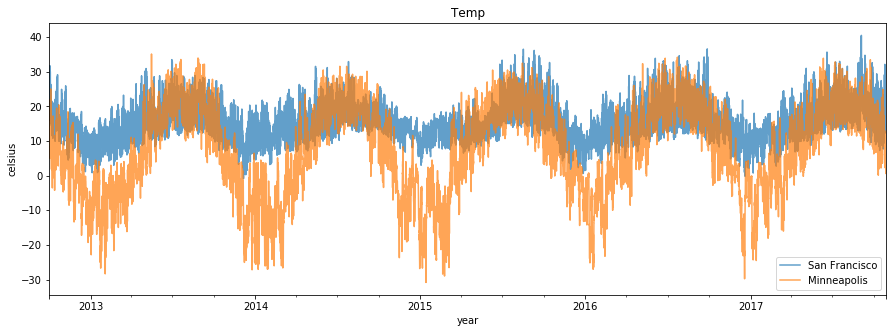

In [72]:
_=data.plot(
    figsize=(15,5),
    subplots=False,
    title='Temp',
    alpha=0.7
)
_=plt.xlabel('year')
_=plt.ylabel('celsius')

In [23]:
complete_san_f = data['San Francisco'].dropna()

In [24]:
last_date = complete_san_f.index.max()

In [25]:
data = data[data.index <= last_date]

In [26]:
data.isna().sum()

San Francisco     1
Minneapolis      13
dtype: int64

In [30]:
import datetime

In [31]:
data.index = pd.to_datetime(data.index)

In [33]:
data_avg = data.resample('D').mean()

In [34]:
data_min = data.resample('D').min()

In [35]:
data_max = data.resample('D').max()

In [36]:
data_mean.shape

(1854, 2)

In [39]:
data_avg.describe()

,San Francisco,Minneapolis
count,1854.000000,1854.000000
mean,15.013381,7.667746
std,4.047529,12.385574
min,2.970833,-24.687187
25%,12.271016,-1.058090
50%,14.938721,9.011625
75%,17.918520,18.690818
max,29.487500,30.538125


In [40]:
data_avg.isna().sum()

San Francisco    0
Minneapolis      0
dtype: int64

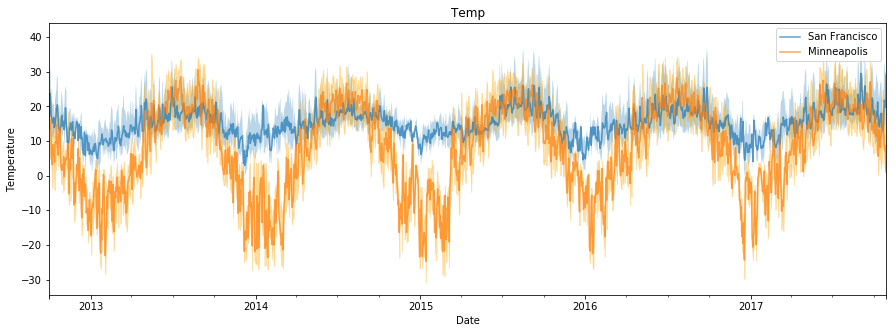

In [50]:
_=data_avg.plot(
    figsize=(15,5),
    subplots=False,
    title='Temp',
    alpha=0.7
)
_=plt.fill_between(
    x=data_avg.index,
    y1=data_min['San Francisco'].values,
    y2=data_max['San Francisco'].values,
    alpha=0.3
)
_=plt.fill_between(
    x=data_avg.index,
    y1=data_min['Minneapolis'].values,
    y2=data_max['Minneapolis'].values,
    color='orange',
    alpha=0.3
)
_=plt.xlabel('Date')
_=plt.ylabel('Temperature')

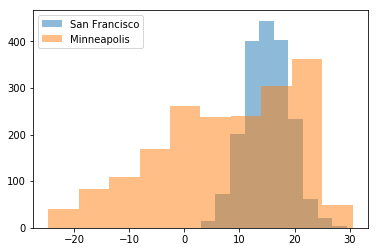

In [42]:
_=plt.hist(data_avg['San Francisco'], alpha=0.5, label='San Francisco')
_=plt.hist(data_avg['Minneapolis'], alpha=0.5, label='Minneapolis')
_=plt.legend()

In [43]:
sliece = data_avg.index[int(0.5*len(data_avg))]

In [64]:
sliece

Timestamp('2015-04-16 00:00:00', freq='D')

In [46]:
data_avg.loc[:sliece].mean()

San Francisco    14.165476
Minneapolis       4.474264
dtype: float64

In [47]:
data_avg.loc[sliece:].mean()

San Francisco    15.863599
Minneapolis      10.873516
dtype: float64

In [48]:
data_avg.loc[:sliece].std()

San Francisco     3.568757
Minneapolis      13.069418
dtype: float64

In [49]:
data_avg.loc[sliece:].std()

San Francisco     4.311676
Minneapolis      10.748980
dtype: float64

In [65]:
result = adfuller(data_avg['San Francisco'])

In [58]:
result

(-3.6420154189634157,
 0.005006760699478371,
 10,
 1843,
 {'1%': -3.4339031369299082,
  '5%': -2.86310951119337,
  '10%': -2.567605552981777},
 6780.393146144901)

In [59]:
res = adfuller(data_avg['Minneapolis'])

In [60]:
res

(-2.5898360139157575,
 0.09511620540292998,
 15,
 1838,
 {'1%': -3.4339128162492356,
  '5%': -2.863113784245469,
  '10%': -2.567607828232656},
 9870.415456547944)

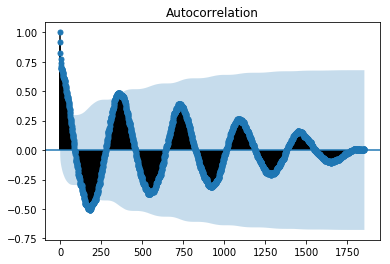

In [66]:
_=sm.graphics.tsa.plot_acf(data_avg['San Francisco'])
plt.show()

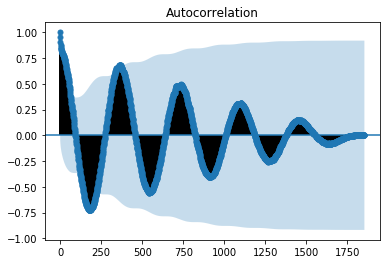

In [67]:
_=sm.graphics.tsa.plot_acf(data_avg['Minneapolis'])
plt.show()

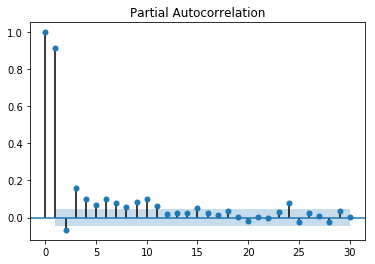

In [69]:
_=sm.graphics.tsa.plot_pacf(data_avg['San Francisco'], lags=30)
plt.show()

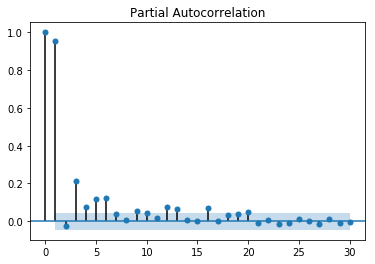

In [70]:
_=sm.graphics.tsa.plot_pacf(data_avg['Minneapolis'], lags=30)
plt.show()

In [74]:
sd_San_f = sd(data_avg['San Francisco'], freq=365)

In [75]:
sd_Minn = sd(data_avg['Minneapolis'], freq=365)

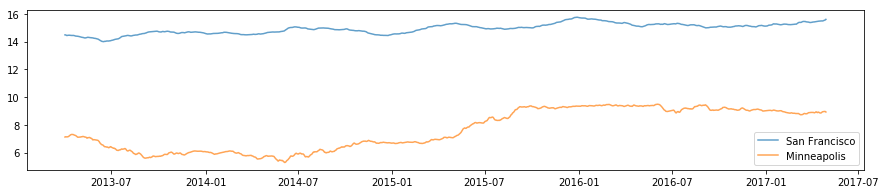

In [80]:
_=plt.figure(figsize=(15,10))
ax1=plt.subplot(311)
_=ax1.plot(sd_San_f.trend, label='San Francisco', alpha=0.7)
_=ax1.plot(sd_Minn.trend, label='Minneapolis', alpha=0.7)
_=plt.legend()

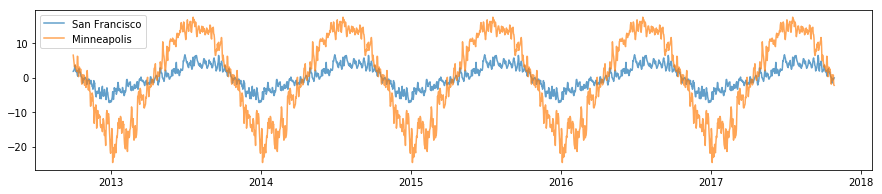

In [79]:
_=plt.figure(figsize=(15,10))
ax2=plt.subplot(312)
_=ax2.plot(sd_San_f.seasonal, label='San Francisco', alpha=0.7)
_=ax2.plot(sd_Minn.seasonal, label='Minneapolis', alpha=0.7)
_=plt.legend()

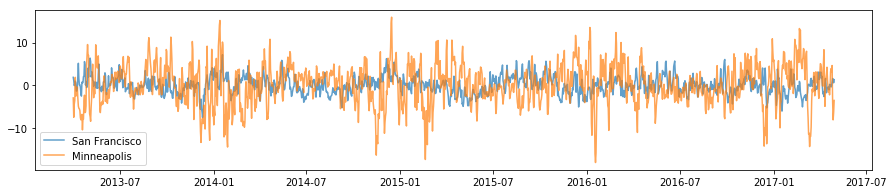

In [81]:
_=plt.figure(figsize=(15,10))
ax3=plt.subplot(313)
_=ax3.plot(sd_San_f.resid, label='San Francisco', alpha=0.7)
_=ax3.plot(sd_Minn.resid, label='Minneapolis', alpha=0.7)
_=plt.legend()